## EXNO-3-DS

# AIM:
To read the given data and perform Feature Encoding and Transformation process and save the data to a file.

# ALGORITHM:
STEP 1:Read the given Data.
STEP 2:Clean the Data Set using Data Cleaning Process.
STEP 3:Apply Feature Encoding for the feature in the data set.
STEP 4:Apply Feature Transformation for the feature in the data set.
STEP 5:Save the data to the file.

# FEATURE ENCODING:
1. Ordinal Encoding
An ordinal encoding involves mapping each unique label to an integer value. This type of encoding is really only appropriate if there is a known relationship between the categories. This relationship does exist for some of the variables in our dataset, and ideally, this should be harnessed when preparing the data.
2. Label Encoding
Label encoding is a simple and straight forward approach. This converts each value in a categorical column into a numerical value. Each value in a categorical column is called Label.
3. Binary Encoding
Binary encoding converts a category into binary digits. Each binary digit creates one feature column. If there are n unique categories, then binary encoding results in the only log(base 2)ⁿ features.
4. One Hot Encoding
We use this categorical data encoding technique when the features are nominal(do not have any order). In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.

# Methods Used for Data Transformation:
  # 1. FUNCTION TRANSFORMATION
• Log Transformation
• Reciprocal Transformation
• Square Root Transformation
• Square Transformation
  # 2. POWER TRANSFORMATION
• Boxcox method
• Yeojohnson method

# CODING AND OUTPUT:

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Encoding Data.csv");

In [ ]:
df

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold
5,5,T,N,Green,Hot
6,6,F,N,Red,Cold
7,7,T,N,Red,Cold
8,8,F,N,Blue,Warm
9,9,F,Y,Red,Hot


In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [ ]:
pm = ['Hot','Warm','Cold']

In [ ]:
e1 = OrdinalEncoder(categories=[pm])

In [ ]:
e1.fit_transform(df[["ord_2"]])

array([[0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.]])

In [ ]:
df['bo2'] = e1.fit_transform(df[["ord_2"]])

In [ ]:
df

,id,bin_1,bin_2,nom_0,ord_2,bo2
0,0,F,N,Red,Hot,0.0
1,1,F,Y,Blue,Warm,1.0
2,2,F,N,Blue,Cold,2.0
3,3,F,N,Green,Warm,1.0
4,4,T,N,Red,Cold,2.0
5,5,T,N,Green,Hot,0.0
6,6,F,N,Red,Cold,2.0
7,7,T,N,Red,Cold,2.0
8,8,F,N,Blue,Warm,1.0
9,9,F,Y,Red,Hot,0.0


In [ ]:
le = LabelEncoder()

In [ ]:
dfc = df.copy()

In [ ]:
dfc['ord_2'] = le.fit_transform(dfc['ord_2'])

In [ ]:
dfc

,id,bin_1,bin_2,nom_0,ord_2,bo2
0,0,F,N,Red,1,0.0
1,1,F,Y,Blue,2,1.0
2,2,F,N,Blue,0,2.0
3,3,F,N,Green,2,1.0
4,4,T,N,Red,0,2.0
5,5,T,N,Green,1,0.0
6,6,F,N,Red,0,2.0
7,7,T,N,Red,0,2.0
8,8,F,N,Blue,2,1.0
9,9,F,Y,Red,1,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse = False)

In [ ]:
df2 = df.copy()

In [ ]:
enc = pd.DataFrame(ohe.fit_transform(df2[['nom_0']]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df2 = pd.concat([df2,enc],axis = 1)

In [ ]:
df2

,id,bin_1,bin_2,nom_0,ord_2,bo2,0,1,2
0,0,F,N,Red,Hot,0.0,0.0,0.0,1.0
1,1,F,Y,Blue,Warm,1.0,1.0,0.0,0.0
2,2,F,N,Blue,Cold,2.0,1.0,0.0,0.0
3,3,F,N,Green,Warm,1.0,0.0,1.0,0.0
4,4,T,N,Red,Cold,2.0,0.0,0.0,1.0
5,5,T,N,Green,Hot,0.0,0.0,1.0,0.0
6,6,F,N,Red,Cold,2.0,0.0,0.0,1.0
7,7,T,N,Red,Cold,2.0,0.0,0.0,1.0
8,8,F,N,Blue,Warm,1.0,1.0,0.0,0.0
9,9,F,Y,Red,Hot,0.0,0.0,0.0,1.0


In [ ]:
pd.get_dummies(df2,columns=["nom_0"])

,id,bin_1,bin_2,ord_2,bo2,0,1,2,nom_0_Blue,nom_0_Green,nom_0_Red
0,0,F,N,Hot,0.0,0.0,0.0,1.0,0,0,1
1,1,F,Y,Warm,1.0,1.0,0.0,0.0,1,0,0
2,2,F,N,Cold,2.0,1.0,0.0,0.0,1,0,0
3,3,F,N,Warm,1.0,0.0,1.0,0.0,0,1,0
4,4,T,N,Cold,2.0,0.0,0.0,1.0,0,0,1
5,5,T,N,Hot,0.0,0.0,1.0,0.0,0,1,0
6,6,F,N,Cold,2.0,0.0,0.0,1.0,0,0,1
7,7,T,N,Cold,2.0,0.0,0.0,1.0,0,0,1
8,8,F,N,Warm,1.0,1.0,0.0,0.0,1,0,0
9,9,F,Y,Hot,0.0,0.0,0.0,1.0,0,0,1


In [ ]:
pip install --upgrade category_encoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
from category_encoders import BinaryEncoder

In [ ]:
dfv1 = pd.read_csv("/content/data.csv")

In [ ]:
dfv1

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target
0,0,F,N,Delhi,Hot,High School,0
1,1,F,Y,Bangalore,Warm,Masters,1
2,2,M,N,Mumbai,Very Hot,Diploma,1
3,3,M,Y,Chennai,Cold,Bachelors,0
4,4,M,Y,Delhi,Cold,Bachelors,1
5,5,F,N,Delhi,Very Hot,Masters,0
6,6,M,N,Chennai,Warm,PhD,1
7,7,F,N,Chennai,Hot,High School,1
8,8,M,N,Delhi,Very Hot,High School,0
9,9,F,Y,Delhi,Warm,PhD,0


In [ ]:
be=BinaryEncoder()

In [ ]:
nd = be.fit_transform(dfv1['Ord_2'])

In [ ]:
dfb = pd.concat([dfv1,nd],axis=1)

In [ ]:
dfv2 = dfb.copy()

In [ ]:
dfv2

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target,Ord_2_0,Ord_2_1,Ord_2_2
0,0,F,N,Delhi,Hot,High School,0,0,0,1
1,1,F,Y,Bangalore,Warm,Masters,1,0,1,0
2,2,M,N,Mumbai,Very Hot,Diploma,1,0,1,1
3,3,M,Y,Chennai,Cold,Bachelors,0,1,0,0
4,4,M,Y,Delhi,Cold,Bachelors,1,1,0,0
5,5,F,N,Delhi,Very Hot,Masters,0,0,1,0
6,6,M,N,Chennai,Warm,PhD,1,1,0,1
7,7,F,N,Chennai,Hot,High School,1,0,0,1
8,8,M,N,Delhi,Very Hot,High School,0,0,0,1
9,9,F,Y,Delhi,Warm,PhD,0,1,0,1


In [ ]:
from category_encoders import TargetEncoder

In [ ]:
te = TargetEncoder()

In [ ]:
cc = dfv1.copy()

In [ ]:
new = te.fit_transform(X=cc["City"],y = cc["Target"])

In [ ]:
cc = pd.concat([cc,new],axis=1)

In [ ]:
cc

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target,City
0,0,F,N,Delhi,Hot,High School,0,0.445272
1,1,F,Y,Bangalore,Warm,Masters,1,0.565054
2,2,M,N,Mumbai,Very Hot,Diploma,1,0.565054
3,3,M,Y,Chennai,Cold,Bachelors,0,0.525744
4,4,M,Y,Delhi,Cold,Bachelors,1,0.445272
5,5,F,N,Delhi,Very Hot,Masters,0,0.445272
6,6,M,N,Chennai,Warm,PhD,1,0.525744
7,7,F,N,Chennai,Hot,High School,1,0.525744
8,8,M,N,Delhi,Very Hot,High School,0,0.445272
9,9,F,Y,Delhi,Warm,PhD,0,0.445272


# FUTURE TRANSFORMATION

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

In [ ]:
df=pd.read_csv("/content/Data_to_Transform.csv")

In [ ]:
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296
...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882
9996,14.854474,16.396252,-3.147526,-3.772332
9997,15.262103,17.102991,-3.517256,-4.717950
9998,15.269983,17.628467,-4.689833,-5.670496


In [ ]:
df.skew()

Moderate Positive Skew    0.656308
Highly Positive Skew      1.271249
Moderate Negative Skew   -0.690244
Highly Negative Skew     -1.201891
dtype: float64

In [ ]:
np.log(df["Highly Positive Skew"])

0       1.063011
1       1.085995
2       1.087342
3       1.098720
4       1.102640
          ...   
9995    2.790522
9996    2.797053
9997    2.839253
9998    2.869515
9999    2.893275
Name: Highly Positive Skew, Length: 10000, dtype: float64

In [ ]:
np.reciprocal(df["Moderate Positive Skew"])

0       1.111123
1       0.898026
2       0.864431
3       0.791057
4       0.755336
          ...   
9995    0.067801
9996    0.067320
9997    0.065522
9998    0.065488
9999    0.061711
Name: Moderate Positive Skew, Length: 10000, dtype: float64

In [ ]:
np.sqrt(df["Highly Positive Skew"])

0       1.701492
1       1.721158
2       1.722317
3       1.732144
4       1.735543
          ...   
9995    4.036027
9996    4.049229
9997    4.135576
9998    4.198627
9999    4.248803
Name: Highly Positive Skew, Length: 10000, dtype: float64

In [ ]:
np.square(df["Highly Positive Skew"])

0         8.381452
1         8.775724
2         8.799396
3         9.001942
4         9.072800
           ...    
9995    265.348230
9996    268.837091
9997    292.512290
9998    310.762852
9999    325.886637
Name: Highly Positive Skew, Length: 10000, dtype: float64

In [ ]:
df["Highly Positive Skew"],parameters=stats.boxcox(df["Highly Positive Skew"])

In [ ]:
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,0.812909,11.180748,9.027485
1,1.113554,0.825921,10.842938,9.009762
2,1.156830,0.826679,10.817934,9.006134
3,1.264131,0.833058,10.764570,9.000125
4,1.323914,0.835247,10.753117,8.981296
...,...,...,...,...
9995,14.749050,1.457701,-2.980821,-3.254882
9996,14.854474,1.459189,-3.147526,-3.772332
9997,15.262103,1.468681,-3.517256,-4.717950
9998,15.269983,1.475357,-4.689833,-5.670496


In [ ]:
df["Moderate Negative Skew_yeojohnson"],parameters=stats.yeojohnson(df["Moderate Negative Skew"])

In [ ]:
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Moderate Negative Skew_yeojohnson
0,0.899990,0.812909,11.180748,9.027485,29.137805
1,1.113554,0.825921,10.842938,9.009762,27.885272
2,1.156830,0.826679,10.817934,9.006134,27.793301
3,1.264131,0.833058,10.764570,9.000125,27.597360
4,1.323914,0.835247,10.753117,8.981296,27.555368
...,...,...,...,...,...
9995,14.749050,1.457701,-2.980821,-3.254882,-1.949345
9996,14.854474,1.459189,-3.147526,-3.772332,-2.028952
9997,15.262103,1.468681,-3.517256,-4.717950,-2.199693
9998,15.269983,1.475357,-4.689833,-5.670496,-2.697151


In [ ]:
df.skew()

Moderate Positive Skew               0.656308
Highly Positive Skew                 0.023089
Moderate Negative Skew              -0.690244
Highly Negative Skew                -1.201891
Moderate Negative Skew_yeojohnson   -0.119651
dtype: float64

In [ ]:
from sklearn.preprocessing import QuantileTransformer

In [ ]:
qt = QuantileTransformer(output_distribution='normal')

In [ ]:
df["Moderate Negative Skew_1"]= qt.fit_transform(df[["Moderate Negative Skew"]])

In [ ]:
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Moderate Negative Skew_yeojohnson,Moderate Negative Skew_1
0,0.899990,0.812909,11.180748,9.027485,29.137805,5.199338
1,1.113554,0.825921,10.842938,9.009762,27.885272,3.227288
2,1.156830,0.826679,10.817934,9.006134,27.793301,3.206801
3,1.264131,0.833058,10.764570,9.000125,27.597360,3.167111
4,1.323914,0.835247,10.753117,8.981296,27.555368,3.159208
...,...,...,...,...,...,...
9995,14.749050,1.457701,-2.980821,-3.254882,-1.949345,-3.147619
9996,14.854474,1.459189,-3.147526,-3.772332,-2.028952,-3.162489
9997,15.262103,1.468681,-3.517256,-4.717950,-2.199693,-3.198205
9998,15.269983,1.475357,-4.689833,-5.670496,-2.697151,-3.350199


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

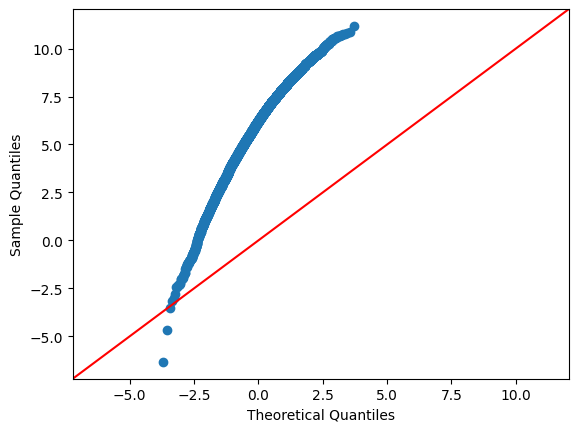

In [ ]:
sm.qqplot(df['Moderate Negative Skew'],line='45')
plt.show()

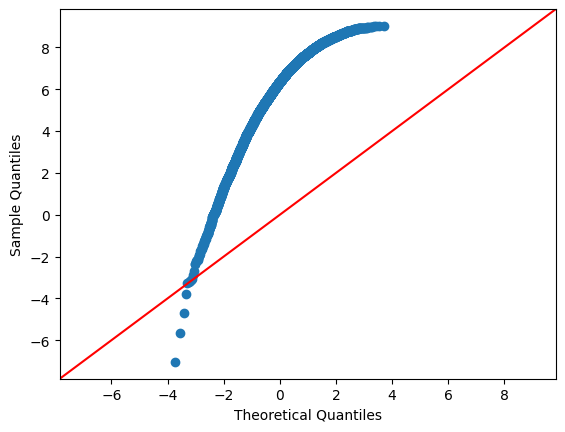

In [ ]:
sm.qqplot(df['Highly Negative Skew'],line='45')
plt.show()

#RESULT:
Thus the program to read the given data and perform Feature Encoding and Transformation process and save the data to a file is created, executed and the output is verified successfully.